### Import Libraries

In [0]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

### Importing dataset

In [2]:
from keras.datasets import cifar10

Using TensorFlow backend.


In [0]:
(x_train, y_train), (x_test,y_test) = cifar10.load_data()

In [4]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [5]:
print(y_test)

[[3]
 [8]
 [8]
 ...
 [5]
 [1]
 [7]]


In [0]:
NUM_CLASSES = 10
cifar10_classes = ["airplane", "automobile", "bird", "cat", "deer", 
                   "dog", "frog", "horse", "ship", "truck"]

### Normalising The input

In [0]:
x_train = x_train/255.0
x_test = x_test/255.0

### Creating a Model

#### Don't use Dropout in Convolution layers. Use them only in Fully connected layers(0.5-0.7). If adding in conv layer, use smaller values(0.1-0.2).

In [0]:
model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(32,32,3)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(2,2),

        tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(2,2),

        tf.keras.layers.Conv2D(256,(3,3),activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(2,2),

        # tf.keras.layers.Conv2D(512,(1,1),activation='relu'),
        # tf.keras.layers.BatchNormalization(),
        # tf.keras.layers.MaxPooling2D(2,2),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128,activation='relu'),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.BatchNormalization(),

        tf.keras.layers.Dense(256,activation='relu'),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.BatchNormalization(),

        tf.keras.layers.Dense(512,activation='relu'),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.BatchNormalization(),

        tf.keras.layers.Dense(1024,activation='relu'),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.BatchNormalization(),

        tf.keras.layers.Dense(10,activation='softmax')
        ]
    )

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 64)        1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 30, 30, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 128)       73856     
_________________________________________________________________
batch_normalization_1 (Batch (None, 13, 13, 128)       512       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 256)         2

### Compiling the Model

In [0]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

### Defining Callback Function

In [0]:
class myCallBack(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if(logs.get('acc')>0.95):
      self.model_stop_training = True

In [0]:
callbacks = myCallBack()

### Fitting the model

In [14]:
history = model.fit(
            x = x_train, y = y_train,
            epochs = 30,
            validation_data = (x_test,y_test),
            verbose = 1,
            callbacks = [callbacks]
          )

Epoch 1/30
1563/1563 [==============================] - 14s 9ms/step - loss: 1.8937 - acc: 0.3410 - val_loss: 1.4946 - val_acc: 0.4605
Epoch 2/30
1563/1563 [==============================] - 14s 9ms/step - loss: 1.3857 - acc: 0.5110 - val_loss: 1.3916 - val_acc: 0.5039
Epoch 3/30
1563/1563 [==============================] - 13s 9ms/step - loss: 1.1898 - acc: 0.5867 - val_loss: 1.1166 - val_acc: 0.6096
Epoch 4/30
1563/1563 [==============================] - 13s 9ms/step - loss: 1.0464 - acc: 0.6445 - val_loss: 1.0303 - val_acc: 0.6495
Epoch 5/30
1563/1563 [==============================] - 13s 9ms/step - loss: 0.9531 - acc: 0.6782 - val_loss: 1.0347 - val_acc: 0.6482
Epoch 6/30
1563/1563 [==============================] - 14s 9ms/step - loss: 0.8507 - acc: 0.7172 - val_loss: 1.1280 - val_acc: 0.6273
Epoch 7/30
1563/1563 [==============================] - 13s 9ms/step - loss: 0.7731 - acc: 0.7445 - val_loss: 1.0475 - val_acc: 0.6423
Epoch 8/30
1563/1563 [==============================] -

### Visualising our model accuracy

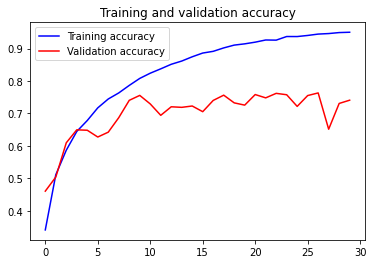

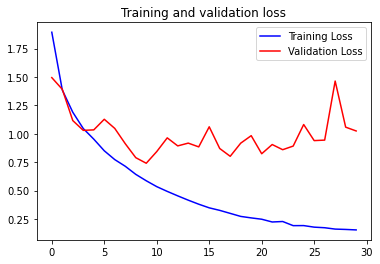

In [15]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Totally Unexpected behavior(Increasing loss and decreasing accuracy) encountered earlier was due to wrong loss function and wrong ImageDataGenerator definition

## Introducing Data Augmentation (it might help)

In [0]:
(x_train, y_train), (x_test,y_test) = cifar10.load_data()

In [0]:
train_datagen = ImageDataGenerator(
                  rescale = 1.0/255,
                  horizontal_flip = True,
                  rotation_range = 20,
                  shear_range = 0.15,
                  width_shift_range = 0.1,
                  height_shift_range = 0.1,
                  zoom_range = 0.2 
                )
training_generator = train_datagen.flow(
                  x_train,
                  y_train,
                  batch_size = 20
                )
validation_datagen = ImageDataGenerator(
                  rescale = 1.0/255 
                )
validation_generator = validation_datagen.flow(
                  x_test,
                  y_test,
                  batch_size = 20
                )

In [0]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

In [33]:
history = model.fit(
            training_generator,
            epochs = 10,
            steps_per_epoch = 50000//20,
            validation_data = validation_generator,
            validation_steps =  10000//20,
            verbose = 1
          )


Epoch 1/10
2500/2500 [==============================] - 48s 19ms/step - loss: 1.1714 - acc: 0.1013 - val_loss: 0.8294 - val_acc: 0.0984
Epoch 2/10
2500/2500 [==============================] - 48s 19ms/step - loss: 1.0713 - acc: 0.1013 - val_loss: 0.8634 - val_acc: 0.1224
Epoch 3/10
2500/2500 [==============================] - 48s 19ms/step - loss: 1.0141 - acc: 0.1007 - val_loss: 0.7821 - val_acc: 0.1027
Epoch 4/10
2500/2500 [==============================] - 48s 19ms/step - loss: 1.0062 - acc: 0.1024 - val_loss: 0.8446 - val_acc: 0.1124
Epoch 5/10
2500/2500 [==============================] - 47s 19ms/step - loss: 0.9756 - acc: 0.1031 - val_loss: 0.7358 - val_acc: 0.1108
Epoch 6/10
2500/2500 [==============================] - 49s 20ms/step - loss: 0.9603 - acc: 0.1019 - val_loss: 0.6730 - val_acc: 0.1064
Epoch 7/10
2500/2500 [==============================] - 48s 19ms/step - loss: 0.9384 - acc: 0.1019 - val_loss: 0.7052 - val_acc: 0.1037
Epoch 8/10
2500/2500 [==========================

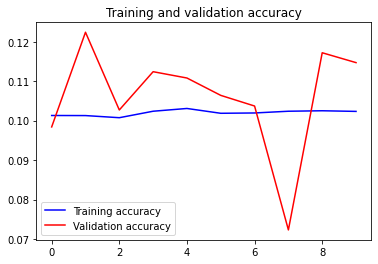

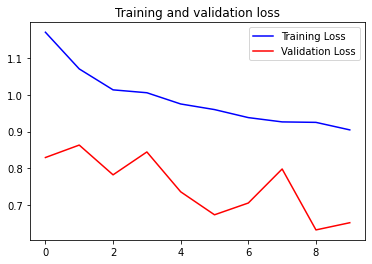

In [34]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Data Augmentation Didn't helped us :(